### Goal:
Your objective is to build a regression model that predicts the rental price (Rent) based on other features such as:

- Size (in sqft)
- BHK (number of bedrooms)
- Bathroom count
- City
- Furnishing status
- Tenant preferred type
- Number of floors
- Area type



In [2]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the file to explore it

In [3]:
rent_dataset = pd.read_csv('House_Rent_Dataset.csv')


Exploring the dataset available

In [4]:
rent_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
rent_dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
rent_dataset.isnull().sum() #Checking for null values

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
rent_dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [20]:
rent_dataset['Size in SqrM'] = rent_dataset['Size'] / 10.764

In [21]:
rent_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
 12  Size in SqrM       4746 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 482.1+ KB


In [23]:
# Checking if there are duplicated values
rent_dataset[rent_dataset.duplicated()]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Size in SqrM


In [9]:
rent_dataset['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Which city has the most expensive rent mean?

In [ ]:
rent_mean_cities = rent_dataset.groupby('City')['Rent'].mean().sort_index()

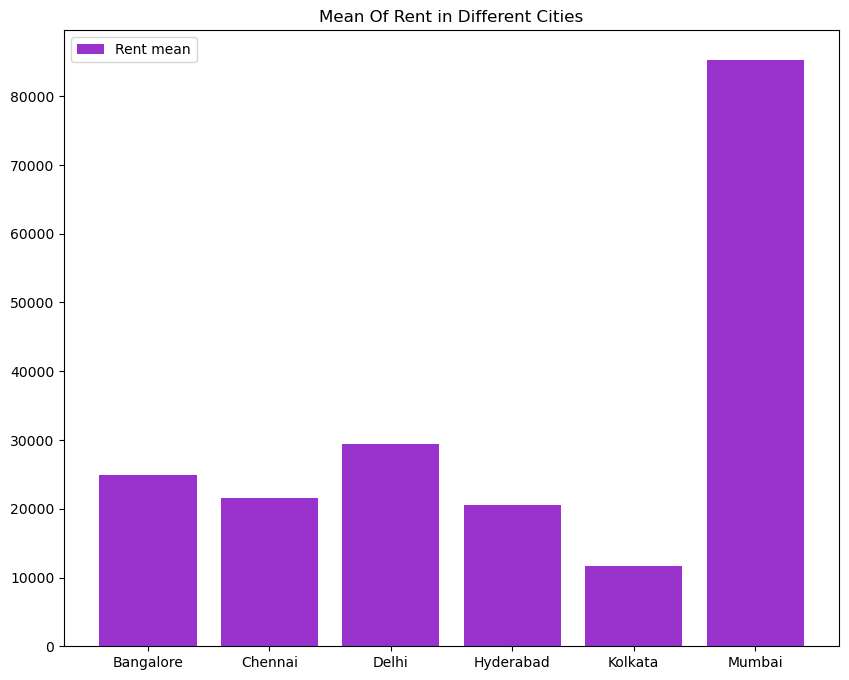

In [27]:
plt.figure(figsize=(10,8))
plt.bar(rent_mean_cities.index, rent_mean_cities.values, width=0.8, label='Rent mean', color='darkorchid')
plt.legend()
plt.title('Mean Of Rent in Different Cities')
plt.show()

To check the correlation between variables

In [28]:
rent_dataset.corr()

,BHK,Rent,Size,Bathroom,Size in SqrM
BHK,1.000000,0.369718,0.716145,0.794885,0.716145
Rent,0.369718,1.000000,0.413551,0.441215,0.413551
Size,0.716145,0.413551,1.000000,0.740703,1.000000
Bathroom,0.794885,0.441215,0.740703,1.000000,0.740703
Size in SqrM,0.716145,0.413551,1.000000,0.740703,1.000000
